In [1]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com
# Arturo Fuenlabrada
# arturofgarza@gmail.com
# Carlos Campos
# carlosocampos1104@gmail.com

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [ ]:
def plot(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_avg = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "-.")
    ax1.plot(gen, fit_maxs, "orange")
    ax1.plot(gen, fit_avg, "--g")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="upper right")
    plt.grid(False)


def decode(W, K):
  cluster_book = {}
  for cluster in range(1, K+1):
    cluster_book[cluster]  = []
  for index in range(len(W)):
    cluster_book[W[index]].append(index)
  return cluster_book

def computeCentroids(features,
                     k,
                     cluster_book):
  return features[cluster_book[k]].sum(axis=0) / features[cluster_book[k]].shape[0]

def S(features , k, cluster_book):
  # calculate the within distance for the cluster K
  if X[cluster_book[k]].shape[0] == 0:
    return 999 # chage this to avoid empty clusterings
  else:
    return ((features[cluster_book[k]] -   computeCentroids(features, k, cluster_book ))**2).sum(axis=0).sum()

def Total_S(W, K, cluster_book, features):
  X = features.copy()
  # Calculate the total distance within distance from the cluster
  acum = 0
  for k in range(1,K+1):
    acum += S(X ,k, cluster_book)
  return acum

def fitness(W, K, features):
  cluster_book = decode(W, K)
  return Total_S(W,K, cluster_book, X),

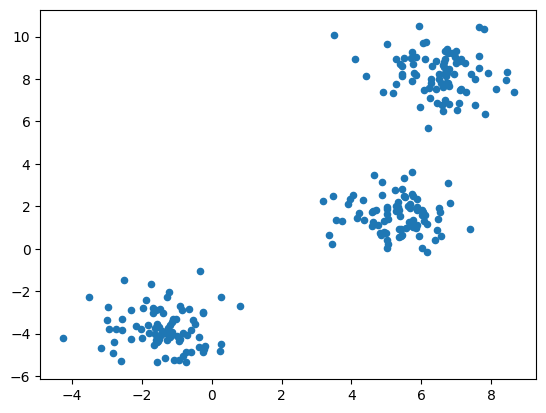

In [ ]:
###
X,y = make_blobs(n_samples = 250, n_features=2, centers=3, cluster_std=0.9, shuffle=True, random_state=231)
plt.scatter(X[:,0], X[:,1], s=20, marker='o')

In [ ]:
#DEAP

In [ ]:
size_chromosome  = X.shape[0]
K = 3
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("cluster_id", random.randint, 1, K) # from one to K clusters
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.cluster_id, size_chromosome)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 500)
toolbox.register("evaluate", lambda W: fitness(W, K , X))
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=K, indpb=0.09)
toolbox.register("select", tools.selTournament, tournsize = 3) #change to rolloute wheel

def main():
    random.seed(1)
    CXPB, MUTPB, NGEN = 0.90, 0.09, 500
    pop  = toolbox.population()  # create the initial population
    hof  = tools.HallOfFame(1) # keep the better individual in each generation
    stats = tools.Statistics(lambda ind: ind.fitness.values) #to keep statistics about population in each population
    # register statiticals functions of numpy library
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook  = algorithms.eaSimple(pop, toolbox, cxpb = CXPB, mutpb = MUTPB,
                                        ngen = NGEN, stats = stats,
                                        halloffame = hof , verbose = True)
    return hof, logbook

if __name__ == "__main__":
    best, log = main()
    print("The better fitness" ,best[0].fitness.values)
    print("solution" , best[0])

gen	nevals	avg    	std    	min    	max   
0  	500   	9354.67	67.8642	8939.53	9426.5
1  	465   	9311.99	89.7856	8926.59	9426.99
2  	446   	9278.53	110.262	8736.81	9426.99
3  	468   	9240.8 	124.69 	8687   	9423.27
4  	456   	9197.3 	149.126	8685.32	9422.83
5  	453   	9136.32	171.964	8601.75	9426.7 
6  	455   	9078.64	192.51 	8400.99	9427.05
7  	447   	8980.34	213.01 	8344.13	9425.07
8  	465   	8884.53	209.479	8290.2 	9419.75
9  	443   	8738.19	194.578	8211.66	9312.21
10 	459   	8614.47	191.387	7941.87	9188.71
11 	448   	8483.77	207.379	7681.59	9040.07
12 	467   	8347.29	227.478	7131.04	8999.03
13 	470   	8195.16	241.891	7131.04	8876.34
14 	455   	8023.84	253.52 	7171.14	8871.7 
15 	470   	7829.24	254.631	7068.05	8706.17
16 	456   	7659.19	259.581	6870.03	8514.59
17 	454   	7478.53	247.748	6671.36	8309.36
18 	452   	7321.82	249.272	6572.11	8407.21
19 	453   	7146.9 	255.055	6363.61	7895.03
20 	456   	6965.31	258.85 	6295.73	7954.56
21 	462   	6795.79	274.513	6030.45	7878.26
22 	468   	66

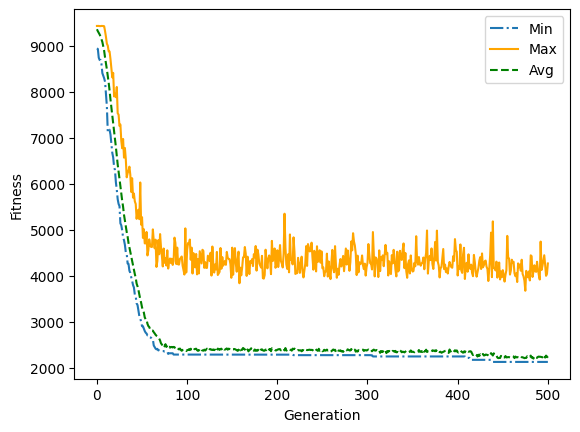

In [ ]:
plot(log)

In [ ]:
solution  = np.array(best[0])

In [ ]:
cluster_book = decode(solution, 3)

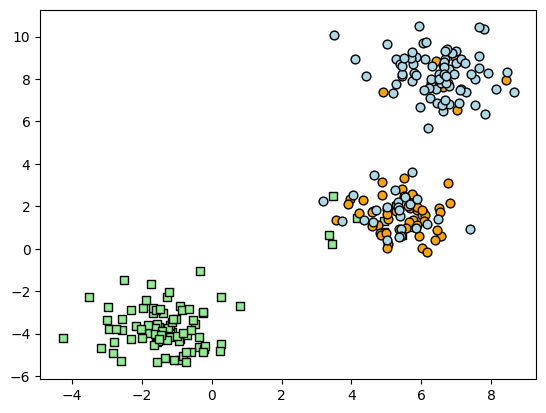

In [ ]:
plt.scatter(X[solution==1,0], X[solution==1,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[solution==2,0], X[solution==2,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[solution==3,0], X[solution==3,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')

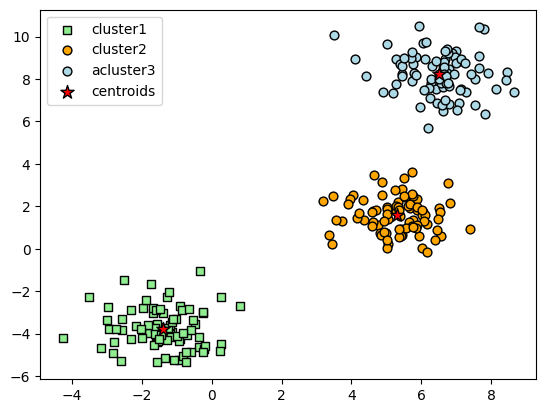

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='cluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

In [ ]:
print(km.inertia_)

409.73350755024575


In [ ]:
# Experimental results!!

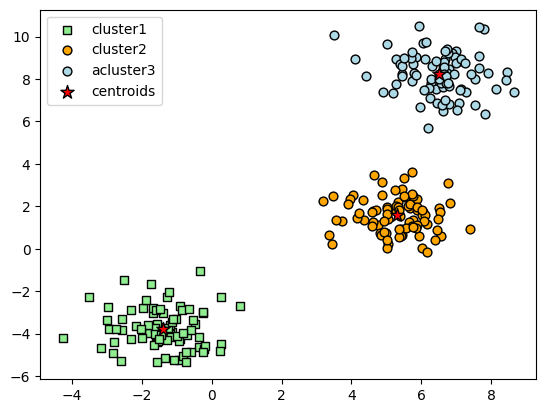

In [ ]:
# Define your initial centroids
initial_centroids = [computeCentroids(X,1, cluster_book),computeCentroids(X,2, cluster_book),computeCentroids(X,3, cluster_book)]

# Create KMeans instance
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1, random_state=42)
y_km = kmeans.fit_predict(X)
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)


In [ ]:
print(kmeans.inertia_)

409.73350755024575
